In [56]:
import numpy as np
import pandas as pd

In [57]:
sms=pd.read_csv(r"C:\Users\KIIT\Desktop\certeficate\Bharat Intern\SMS\spam.csv", encoding='latin-1')

In [58]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
sms.shape

(5572, 2)

In [60]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [61]:
sms.rename(columns={'v1':'target','v2':'text'},inplace=True)
sms.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
print(" no of rows", len(sms))

 no of rows 5572


In [63]:
sms.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [64]:
sms.describe()

,target,text
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [65]:
sms.isnull().sum()

target    0
text      0
dtype: int64

In [66]:
sms.duplicated().sum()

415

In [67]:
sms = sms.drop_duplicates(keep='first')

In [68]:
sms.duplicated().sum()

0

In [69]:
sms.shape

(5157, 2)

In [70]:
sms.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
sms['target'].value_counts()

ham     4516
spam     641
Name: target, dtype: int64

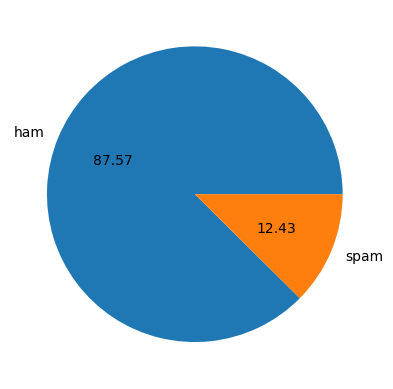

In [72]:
import matplotlib.pyplot as plt
plt.pie(sms['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [81]:
sms.describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557107,1.950553
std,58.382922,13.416801,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [82]:
sms['num_characters'] = sms['text'].apply(len)
sms['num_words'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))
sms['num_sentences'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
sms.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:ylabel='Frequency'>

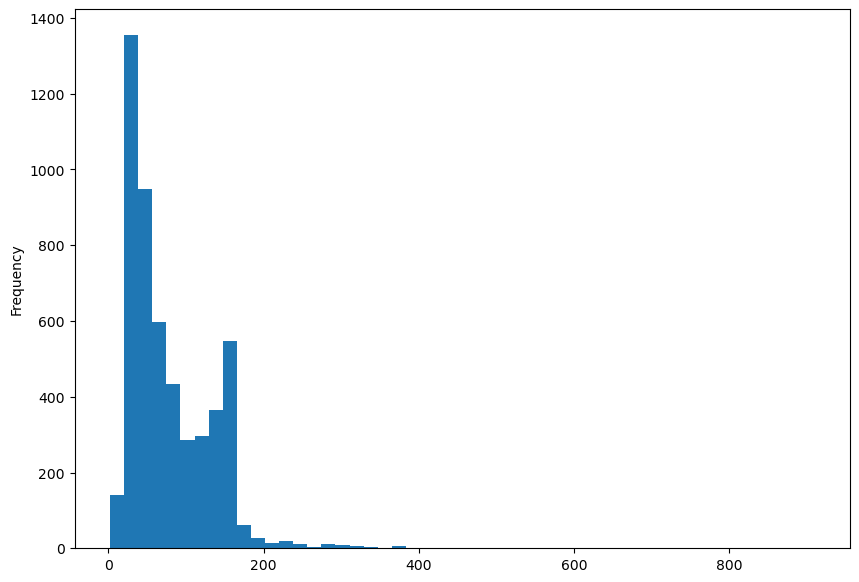

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['num_characters'].plot(bins=50, kind='hist',figsize=(10,7))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

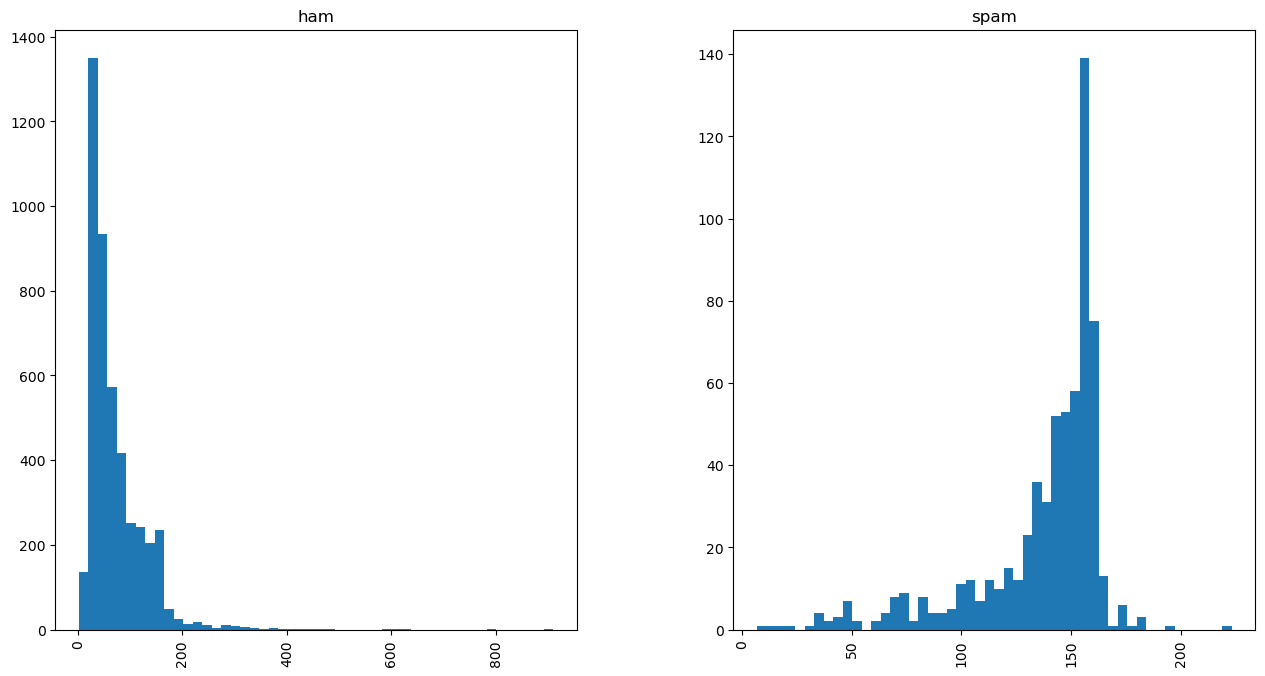

In [84]:
sms.hist(column='num_characters', by='target', bins=50, figsize=(15,8))

In [86]:
sms.loc[:,'target']=sms.target.map({'ham':0, 'spam':1})
sms.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(sms['text'])

x_train, x_test, y_train, y_test= train_test_split(text, sms['target'], test_size=0.20, random_state=1)
text

<5157x8712 sparse matrix of type '<class 'numpy.int64'>'
	with 67935 stored elements in Compressed Sparse Row format>

In [132]:
print(x_train.shape)
print(x_test.shape)

input=text

(4125, 8712)
(1032, 8712)


In [133]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [134]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9825581395348837
Precision score: 0.9906542056074766
Recall score: 0.8617886178861789
F1 score: 0.9217391304347826


In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9825581395348837
Precision score: 0.9906542056074766
Recall score: 0.8617886178861789
F1 score: 0.9217391304347826


In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9825581395348837
Precision score: 0.9906542056074766
Recall score: 0.8617886178861789
F1 score: 0.9217391304347826


In [138]:
input

<5157x8712 sparse matrix of type '<class 'numpy.int64'>'
	with 67935 stored elements in Compressed Sparse Row format>

In [139]:
model.predict(input)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [140]:
data=sms['text']
input="To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"

In [141]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5157, dtype: object

In [166]:
data.loc[len(data.index)]="hfwe ewfjb in jd eif"

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19468\680126283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[len(data.index)]="hfwe ewfjb in jd eif"


In [167]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5157, dtype: object

In [168]:
text=count.fit_transform(data)

In [169]:
text

<5157x8712 sparse matrix of type '<class 'numpy.int64'>'
	with 67935 stored elements in Compressed Sparse Row format>

In [170]:
input=text

In [171]:
model.predict(input)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)